# ExplainableDL & Human Alignment (Integrated Gradients, Attention, BERT)

**Author:** Lennox Anderson

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ij_69maMbPKn9PP9uR9MZsxBwXmPVXTa?usp=sharing)

**Hypothesis:**

- **H₀:** Attention mechanisms in deep learning models trained on legislative data do not exhibit unintended biases when interpreting historical laws, and integrated gradients do not reveal significant patterns of bias.
- **H₁:** Attention mechanisms in deep learning models trained on legislative data do exhibit unintended biases when interpreting historical laws, and these biases can be uncovered and aligned using integrated gradients.


**Citations:**
- Congressional Research Service. (n.d.). Browse U.S. legislative information by legislative subject term. Congress.gov. Library of Congress. Retrieved from https://www.congress.gov/browse
- Libgober, B. (2023). A comprehensive dataset of U.S. federal laws [Data set]. OSF. https://doi.org/10.17605/OSF.IO/MRGHC
License: CC-By Attribution 4.0 International.
- Chalkidis, I., Fergadiotis, M., Malakasiotis, P., Aletras, N., & Androutsopoulos, I. (2020). LEGAL-BERT: The muppets straight out of law school. arXiv. https://doi.org/10.48550/arXiv.2010.02559





***

Steps to Implement the Project
1. Data Preparation and Exploration

    Goal: Preprocess the legislative dataset for fine-tuning a transformer model like BERT.
    Tasks:
        Data Cleaning: Ensure that the text data (e.g., bill titles, summaries) is free from noise, such as irrelevant symbols or incomplete rows.
        Text Tokenization: Tokenize the legislative text (e.g., bill titles or descriptions) to prepare it for training using a pre-trained transformer model.
        Categorization: Assign categories or labels to the bills if available, or define categories such as "civil rights," "trade laws," etc., for supervised learning.

2. Fine-tune a Transformer-Based Model

    Goal: Fine-tune a pre-trained transformer (e.g., BERT) on legislative text to predict bill categories or outcomes.
    Tasks:
        Model Selection: Use a pre-trained model such as BERT or RoBERTa, since these models already have attention layers that are ideal for interpretability.
        Model Fine-Tuning: Fine-tune the model on your dataset with the following steps:
            Input: Text data (e.g., bill titles or summaries).
            Output: Predict categories or outcomes (e.g., bill importance or type: civil rights vs. trade laws).
        Training: Train the model using a standard classification head on top of the transformer layers.

3. Apply Integrated Gradients for Interpretability

    Goal: Use integrated gradients to analyze how different parts of the legislative text contribute to the model’s predictions.
    Tasks:
        Integrated Gradients Method: Integrated gradients compute the contribution of each word to the final prediction by comparing the model's prediction for an input to its prediction for a baseline input (e.g., an empty or neutral version of the input).
        Visualization: For each prediction, generate visualizations that show which words in the legislative text had the most influence on the model's decision.
        Analysis:
            Civil Rights vs. Trade Laws: Investigate if there is a difference in how much attention is given to certain words (e.g., "race," "labor," "commerce") when classifying civil rights laws vs. trade laws.
            Ethical Implications: Determine if the model is over-focusing on specific terms or sections of bills that may introduce bias (e.g., disproportionately classifying laws as "important" due to specific terms that aren’t ethically significant).

4. Investigate Potential Ethical Bias

    Goal: Uncover any potential ethical biases in how the model interprets different types of legislative texts.
    Tasks:
        Bias Detection: Use integrated gradients to analyze the impact of sensitive terms (e.g., related to race, gender, or nationality) on the model’s predictions.
        Comparative Analysis: Compare the attention distribution across different bill categories (e.g., civil rights vs. economic laws) to detect if certain categories receive disproportionate attention.
        Quantify Bias: Develop metrics to measure bias (e.g., how often certain groups of laws or terms are weighted disproportionately in the model's decisions).

5. Align Model’s Attention with Human Ethical Values

    Goal: Develop strategies to adjust the model’s attention patterns to align with human-defined ethical values (e.g., fairness, impartiality).
    Tasks:
        Attention Adjustment: If the model shows biased behavior, experiment with re-weighting specific terms or features in the input text to reduce bias.
        Ethical Alignment: Ensure that the model treats different categories of bills (civil rights, trade, economic laws) in a fair and balanced way, using human feedback loops or external benchmarks.
        Final Evaluation: Evaluate the model's predictions for fairness and alignment with ethical standards after adjustments.

**Dependencies**

In [ ]:
!pip install pandas
!pip install regex
!pip install openai
!pip install transformers
!pip install datasets
!pip install torch
!pip install pyarrow
!pip install --upgrade datasets
!pip install ipywidgets --upgrade
!pip install datasets pyarrow
!pip install tf-keras
!pip install captum
!pip install torch transformers accelerate
!pip install transformers datasets torch pandas scikit-learn
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
  

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import openai
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
import wandb
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from captum.attr import IntegratedGradients, LayerIntegratedGradients
from transformers import BertTokenizer, BertForSequenceClassification
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
from captum.attr import LayerIntegratedGradients
from scipy import stats
from sklearn.metrics import f1_score
import seaborn as sns
from typing import Dict, List, Tuple
import torch
from captum.attr import IntegratedGradients, LayerIntegratedGradients
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from sklearn.preprocessing import LabelEncoder


### **1. Data Preparation and Exploration**

In [ ]:
file_path = '/Users/lennox/Documents/machineLearning/data/policy/master.csv'
data = pd.read_csv(file_path)

data.head()

,row_number,action,Title,sal_volume,sal_page_start,BillCitation,congress_number,chapter,session_number,pl_no,date_of_passage,secondary_date,dates_conflict,Source,URL,alternate_sal_volume,alternate_sal_page_start,has_alternate_sal_citation
0,1,An Act,To regulate the time and manner of administeri...,1,23.0,NaN,1,1.0,1.0,NaN,1789-06-01,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
1,2,An Act,"For laying a duty on goods, wares, and merchan...",1,24.0,NaN,1,2.0,1.0,NaN,1789-07-04,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
2,3,An Act,Imposing duties on tonnage.,1,27.0,NaN,1,3.0,1.0,NaN,1789-07-20,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
3,4,An Act,For establishing an executive department to be...,1,28.0,NaN,1,4.0,1.0,NaN,1789-07-27,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
4,5,An Act,To regulate the collection of the duties impos...,1,29.0,NaN,1,5.0,1.0,NaN,1789-07-31,NaN,NaN,HeinOnline,NaN,NaN,NaN,False


In [ ]:
'''
This script handles null values in the 'Title' column of the dataset by counting and removing rows with missing titles.
'''

# count the number of rows with null values in the 'Title' column
null_title_count = data['Title'].isnull().sum()

# print the count of null values in the 'Title' column
print(f"Number of rows with null values in the 'Title' column: {null_title_count}")

# remove any rows with null values in the 'Title' column
data_Rnv = data.dropna(subset=['Title'])

data_Rnv.head()

Number of rows with null values in the 'Title' column: 0


,row_number,action,Title,sal_volume,sal_page_start,BillCitation,congress_number,chapter,session_number,pl_no,date_of_passage,secondary_date,dates_conflict,Source,URL,alternate_sal_volume,alternate_sal_page_start,has_alternate_sal_citation
0,1,An Act,To regulate the time and manner of administeri...,1,23.0,NaN,1,1.0,1.0,NaN,1789-06-01,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
1,2,An Act,"For laying a duty on goods, wares, and merchan...",1,24.0,NaN,1,2.0,1.0,NaN,1789-07-04,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
2,3,An Act,Imposing duties on tonnage.,1,27.0,NaN,1,3.0,1.0,NaN,1789-07-20,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
3,4,An Act,For establishing an executive department to be...,1,28.0,NaN,1,4.0,1.0,NaN,1789-07-27,NaN,NaN,HeinOnline,NaN,NaN,NaN,False
4,5,An Act,To regulate the collection of the duties impos...,1,29.0,NaN,1,5.0,1.0,NaN,1789-07-31,NaN,NaN,HeinOnline,NaN,NaN,NaN,False


In [ ]:
'''
This script cleans the 'Title' column in the dataset by replacing common abbreviations
with their full forms, ensuring that titles are more readable and consistent.
'''
# create a dictionary for abbreviations and their replacements
abbreviation_replacements = {
    r'&c.': 'Etcetera',
    r'&': 'and',
    r'\bet al\b': 'and others',
    r'\bviz\b\.': 'namely',
    r'\bi\.e\b\.': 'that is',
    r'\be\.g\b\.': 'for example'
}

# apply each abbreviation replacement to the 'Title' column
def replace_abbreviations(text):
    for pattern, replacement in abbreviation_replacements.items():
        text = re.sub(pattern, replacement, text)
    return text

# create new column
data_Rnv['Title_cleaned'] = data_Rnv['Title'].apply(replace_abbreviations)

# show before and after
data_Rnv[['Title', 'Title_cleaned']].head()

# verify that the Title_cleaned no longer contains abbreviations like &, &c, etc.
# filter rows where the original title differs from the cleaned title
changed_titles = data_Rnv[data_Rnv['Title'] != data_Rnv['Title_cleaned']][['Title', 'Title_cleaned']]

# show entire title
pd.set_option('display.max_colwidth', None)

# display the rows where the titles were modified
display(changed_titles)

,Title,Title_cleaned
1416,"To authorize the building of three light-houses, viz., one on Race Point, one on Point Gammon, and one on the Island of Petite Manon, in the State of Massachusetts.","To authorize the building of three light-houses, namely, one on Race Point, one on Point Gammon, and one on the Island of Petite Manon, in the State of Massachusetts."
1827,"Providing for the security in the transmission of letters, &c., in the public mails.","Providing for the security in the transmission of letters, Etcetera, in the public mails."
2862,"To authorize the Secretary of War to receive additional evidence in support of the claims of Massachusetts and other States of the United States, for disbursements, services, &c., during the late war.","To authorize the Secretary of War to receive additional evidence in support of the claims of Massachusetts and other States of the United States, for disbursements, services, Etcetera, during the late war."
3164,"To present incorporated universities, colleges, &c., with copies of the Catalogue of the Library of Congress.","To present incorporated universities, colleges, Etcetera, with copies of the Catalogue of the Library of Congress."
3186,"Making appropriation for the pay, subsistence, &c., of a Home Squadron.","Making appropriation for the pay, subsistence, Etcetera, of a Home Squadron."
3594,"To provide for the distribution of the edition of the Laws and Treaties of the United States published by Little & Brown, under the provisions of the resolution of Congress, approved March third, eighteen hundred and forty-five, and for other purposes.","To provide for the distribution of the edition of the Laws and Treaties of the United States published by Little and Brown, under the provisions of the resolution of Congress, approved March third, eighteen hundred and forty-five, and for other purposes."
3709,"To amend the act entitled ""An Act to appropriate the proceeds of the sales of the public lands, and to grant preemption rights,"" &c., approved September fourth, eighteen hundred and forty-one.","To amend the act entitled ""An Act to appropriate the proceeds of the sales of the public lands, and to grant preemption rights,"" Etcetera, approved September fourth, eighteen hundred and forty-one."
3773,"Making appropriations for lighthouses, lightboats, buoys, &c., and providing for the erection and establishment of the same.","Making appropriations for lighthouses, lightboats, buoys, Etcetera, and providing for the erection and establishment of the same."
3814,"Making appropriations for lighthouses, light-boats, buoys, &c., and providing for the erection and establishment of the same, and for other purposes.","Making appropriations for lighthouses, light-boats, buoys, Etcetera, and providing for the erection and establishment of the same, and for other purposes."
3901,"Making appropriations for lighthouses, light-boats, buoys, &c., and providing for the erection and establishment of the same, and for other purposes.","Making appropriations for lighthouses, light-boats, buoys, Etcetera, and providing for the erection and establishment of the same, and for other purposes."


In [ ]:
'''
This script categorizes legislative bills based on their titles using GPT-4 from OpenAI.
It processes bill titles from a dataset, assigns them to predefined policy categories,
and saves the updated dataset to a CSV file without overwriting existing data.
'''

client = openai.OpenAI(api_key="use gpt api (this process takes ~20 hours)")

# categories from congress
categories = [
    'Agriculture and Food',
    'Armed Forces and National Security',
    'Civil Rights and Liberties, Minority Issues',
    'Commerce',
    'Crime and Law Enforcement',
    'Economics and Public Finance',
    'Education',
    'Energy',
    'Environmental Protection',
    'Families',
    'Finance and Financial Sector',
    'Foreign Trade and International Finance',
    'Government Operations and Politics',
    'Health',
    'Housing and Community Development',
    'Immigration',
    'International Affairs',
    'Labor and Employment',
    'Law',
    'Native Americans',
    'Public Lands and Natural Resources',
    'Science, Technology, Communications',
    'Social Welfare',
    'Taxation',
    'Transportation and Public Works',
    'Water Resources Development',
    'Infrastructure',
    'Veterans',
    'Public Debt',
    'Intellectual Property',
    'Military Logistics',
    'Telecommunications and Information'
]

# GPT function to categorize bill titles
def get_category_from_gpt(title):
    prompt = f"""
    You are tasked with categorizing legislative bills into the following categories:
    {', '.join(categories)}.
    Based on the title of the bill, assign it to the most appropriate category.
    If it's unclear, assign it to 'other'. Be sure to only return the category and nothing else.

    Title: "{title}"
    """

    chat_completion = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant who categorizes legislative bills using knowledge of the U.S Law."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=50,
        temperature=0
    )

    # extract the category from the response
    category = chat_completion.choices[0].message.content.strip()
    return category

# path to your CSV file
file_path = '/Users/lennox/Documents/machineLearning/data/policy/masterCategorized.csv'

# load the dataset
data_Rnv = pd.read_csv(file_path)

# ensure the 'Category' column exists for init run
if 'Category' not in data_Rnv.columns:
    data_Rnv['Category'] = pd.NA

# filter rows that have not been categorized yet
uncategorized_rows = data_Rnv[data_Rnv['Category'].isna()]

# batch size
batch_size = 500

# only process if there are uncategorized rows
if len(uncategorized_rows) > 0:
    rows_to_process = uncategorized_rows.head(batch_size)

    # apply the categorization function to the batch
    data_Rnv.loc[rows_to_process.index, 'Category'] = rows_to_process['Title'].apply(get_category_from_gpt)

    # save the updated rows back to the CSV (don't overwrite the entire file)
    data_Rnv.to_csv(file_path, index=False)

    # feedback on how many rows were processed
    print(f"Processed and categorized {len(rows_to_process)} rows. Data saved to CSV.")
else:
    print("All rows are already categorized.")


Processed and categorized 496 rows. Data saved to CSV.


In this step, we focused on cleaning and organizing the legislative dataset. First, we handled any missing values by removing rows where the bill titles were null. Then, we cleaned the 'Title' column by replacing common abbreviations with their full forms for consistency and readability. Lastly, we used GPT-4-Latest to categorize the legislative bills into predefined policy categories, ensuring that the dataset is well-labeled and ready for supervised learning tasks.

### **2. Fine-tune BERT(Legal) Transformer-Based Model**

---

In [ ]:
import pandas as pd
import torch
import wandb
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json

# init wanb for real time train info
wandb.init(project="legal-bert-classification", name="training-run-1")

# had to buy credit on colab to use T4 gpu
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# load the dataset that was create prior
file_path = './masterCategorized.csv'
data = pd.read_csv(file_path)

print(data.head())

texts = data['Title'].astype(str).tolist()
labels = data['Category'].tolist()

# encode numeric
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_labels = len(label_encoder.classes_)

# log to wanb and save model
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
wandb.log({"label_mapping": label_mapping})

# save label as file
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

print("Label mapping saved to 'label_mapping.json'")

# save encode to csv
labels_df = pd.DataFrame({
    'Original Label': labels,
    'Encoded Label': encoded_labels
})
labels_df.to_csv('saved_labels.csv', index=False)
print("Original and encoded labels saved to 'saved_labels.csv'")

# split
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

# tokenizer
model_name = "nlpaueb/legal-bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512)

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# custom pytorch class to handle encodings
class LegislativeDataset(Dataset):

    # constructor method that init
    def __init__(self, encodings, labels):
        self.encodings = encodings  # Store the tokenized inputs (encodings) as a class attribute
        self.labels = labels  # Store the labels (categories) as a class attribute

    # method to get a single data sample
    def __getitem__(self, idx):
        # create a dictionary of tensors for each encoding key and the associated value at the index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # add the label at index idx to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    # method to return the total number of samples
    def __len__(self):
        return len(self.labels)


# create train and validation
train_dataset = LegislativeDataset(train_encodings, train_labels)
val_dataset = LegislativeDataset(val_encodings, val_labels)

# load legal bert model for classification
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.to(device)

# training arguments with wandb
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    learning_rate=5e-6,
    gradient_accumulation_steps=2,
    max_grad_norm=1.0,
    # Add wandb reporting
    report_to="wandb",
    # Add run name for wandb
    run_name="legal-bert-training"
)

# trainer object for training and evaluation
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# train
trainer.train()

# save fine tune model
model.save_pretrained('./fine_tuned_legalbert')
tokenizer.save_pretrained('./fine_tuned_legalbert')

# evaluate model on the validation set
eval_results = trainer.evaluate()

# log final evaluation results to wandb
wandb.log({"final_evaluation": eval_results})

print(f"Evaluation results: {eval_results}")

# close wanb
wandb.finish()


Using device: cuda
   row_number  action                                              Title  \
0           1  An Act  To regulate the time and manner of administeri...   
1           2  An Act  For laying a duty on goods, wares, and merchan...   
2           3  An Act                        Imposing duties on tonnage.   
3           4  An Act  For establishing an executive department to be...   
4           5  An Act  To regulate the collection of the duties impos...   

   sal_volume  sal_page_start BillCitation  congress_number  chapter  \
0           1            23.0          NaN                1      1.0   
1           1            24.0          NaN                1      2.0   
2           1            27.0          NaN                1      3.0   
3           1            28.0          NaN                1      4.0   
4           1            29.0          NaN                1      5.0   

   session_number pl_no date_of_passage secondary_date dates_conflict  \
0             1.0 

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
0,1.295400,1.171942
2,0.935900,0.897976


Epoch,Training Loss,Validation Loss
0,1.295400,1.171942
2,0.827700,0.837666


Evaluation results: {'eval_loss': 0.8376661539077759, 'eval_runtime': 103.9285, 'eval_samples_per_second': 95.739, 'eval_steps_per_second': 11.97, 'epoch': 2.999396984924623}


eval/loss,█▂▁▁
eval/runtime,▇▇█▁
eval/samples_per_second,▂▂▁█
eval/steps_per_second,▂▂▁█
train/epoch,▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇█
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇███
train/grad_norm,▂▂▆▂▃▃▂▂▂▄▅█▃▇▅▃▄▂▄▃▄▆█▄▂▂▅▅▅▃▂▁▅▆▄▅▃▃▂▅
train/learning_rate,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,██▆▆▄▃▃▃▃▃▂▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▂▁▁▂▁▂▁▂
eval/loss,0.83767
eval/runtime,103.9285


### **3. Apply Integrated Gradients for Interpretability**

---


Analyzing: To amend the Food Security Act to strengthen agricultural programs.
Predicted Category: Agriculture and Food
Confidence: 0.8951

Top 5 predictions:
Agriculture and Food: 0.8951
Foreign Trade and International Finance: 0.0110
Commerce: 0.0103
Environmental Protection: 0.0062
Health: 0.0045


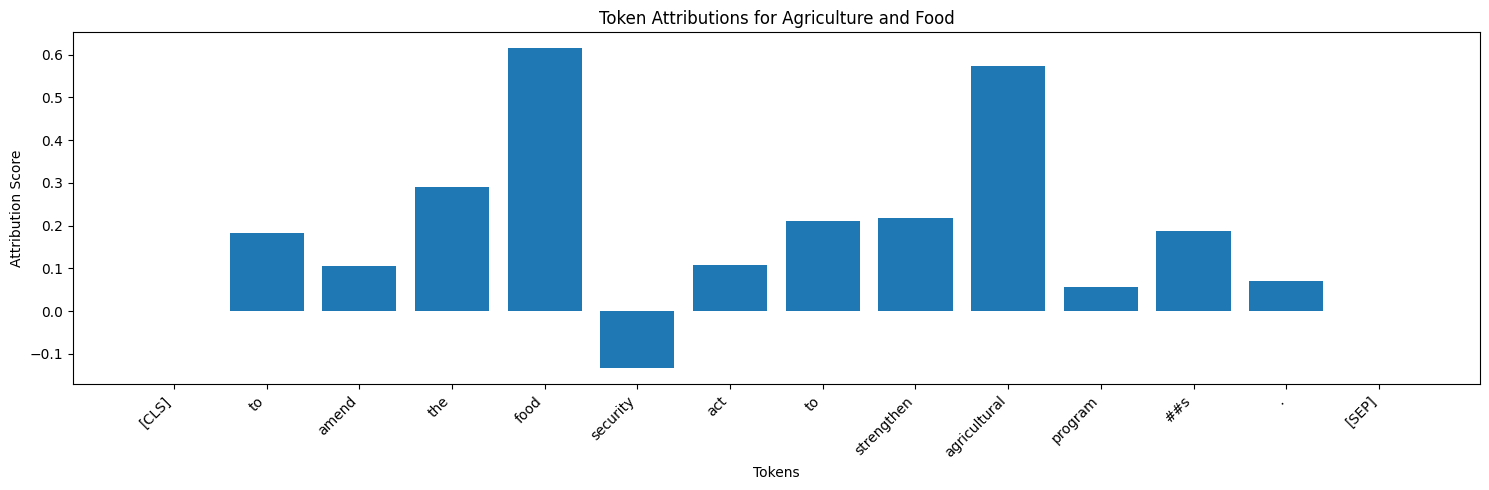


Most influential tokens:
food: 0.6147
agricultural: 0.5730
the: 0.2912
strengthen: 0.2168
to: 0.2120
--------------------------------------------------------------------------------

Analyzing: To improve healthcare services and benefits for veterans.
Predicted Category: Veterans
Confidence: 0.9027

Top 5 predictions:
Veterans: 0.9027
Armed Forces and National Security: 0.0119
Health: 0.0046
Native Americans: 0.0042
Agriculture and Food: 0.0038


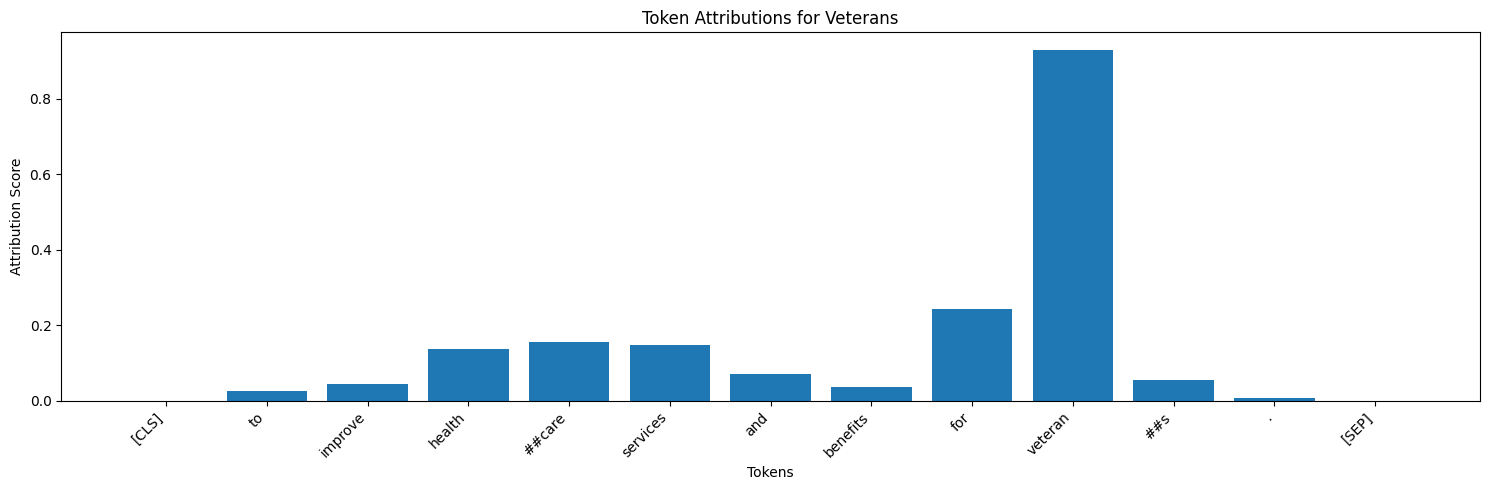


Most influential tokens:
veteran: 0.9298
for: 0.2430
##care: 0.1557
services: 0.1475
health: 0.1361
--------------------------------------------------------------------------------

Analyzing: To strengthen enforcement of civil rights laws and improve access to justice.
Predicted Category: Law
Confidence: 0.2148

Top 5 predictions:
Law: 0.2148
Crime and Law Enforcement: 0.1863
Housing and Community Development: 0.0489
Immigration: 0.0428
International Affairs: 0.0384


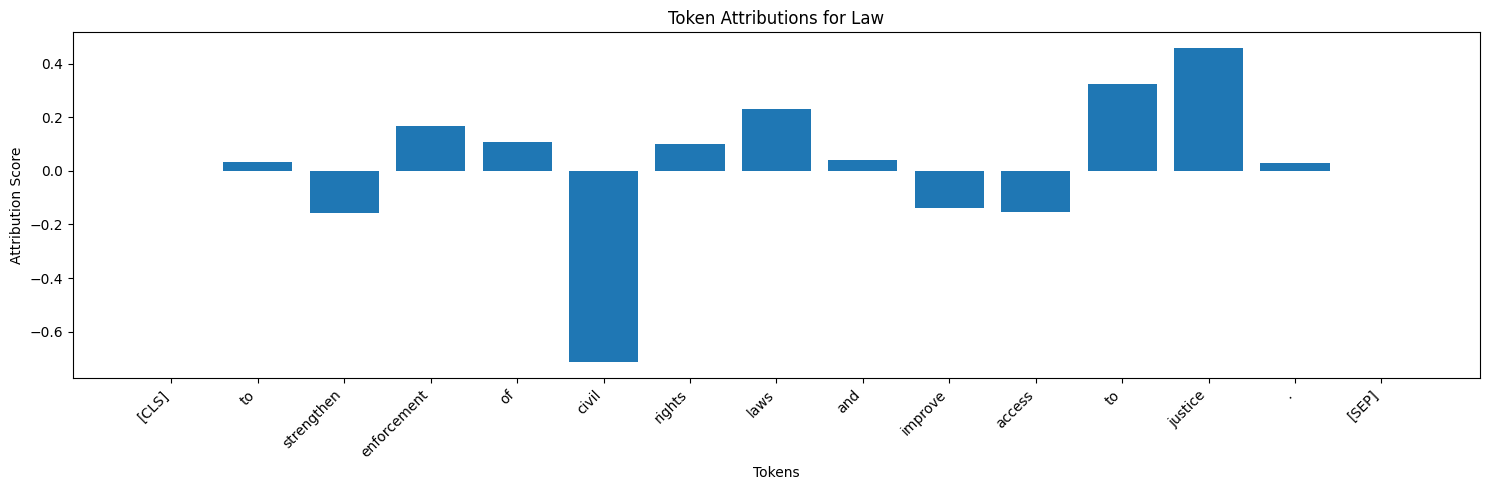


Most influential tokens:
civil: -0.7150
justice: 0.4584
to: 0.3240
laws: 0.2302
enforcement: 0.1657
--------------------------------------------------------------------------------

Analyzing: To develop transportation infrastructure and public transit systems.
Predicted Category: Transportation and Public Works
Confidence: 0.9647

Top 5 predictions:
Transportation and Public Works: 0.9647
Commerce: 0.0050
Infrastructure: 0.0030
Water Resources Development: 0.0018
Foreign Trade and International Finance: 0.0016


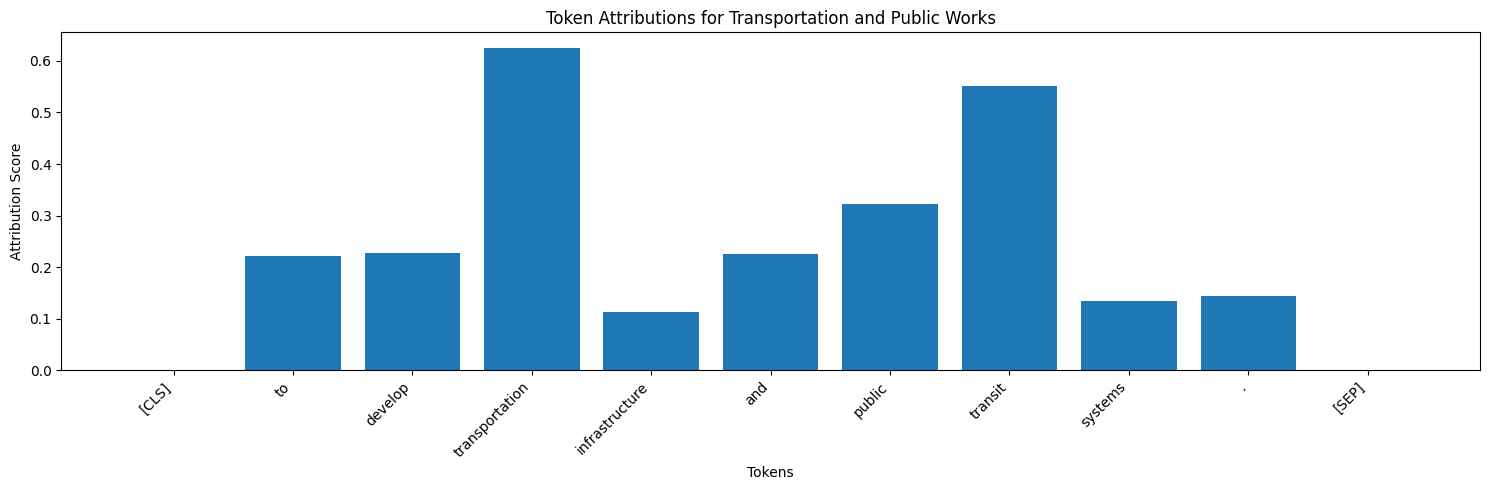


Most influential tokens:
transportation: 0.6242
transit: 0.5513
public: 0.3226
develop: 0.2269
and: 0.2251
--------------------------------------------------------------------------------

Analyzing: To protect endangered species and preserve natural habitats.
Predicted Category: Environmental Protection
Confidence: 0.7301

Top 5 predictions:
Environmental Protection: 0.7301
Public Lands and Natural Resources: 0.0526
Water Resources Development: 0.0248
Agriculture and Food: 0.0190
Native Americans: 0.0169


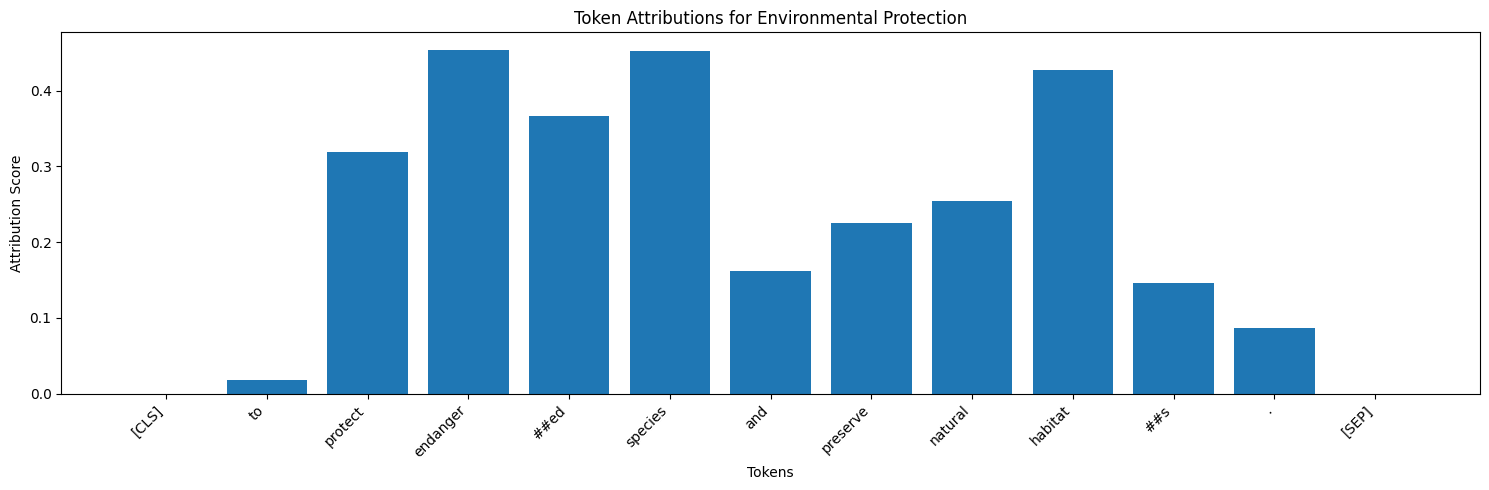


Most influential tokens:
endanger: 0.4542
species: 0.4518
habitat: 0.4274
##ed: 0.3671
protect: 0.3190
--------------------------------------------------------------------------------


In [ ]:
class LegislativeBillAnalyzer:
    def __init__(self, model_path: str):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = BertForSequenceClassification.from_pretrained(model_path)
        self.tokenizer = BertTokenizer.from_pretrained(model_path)
        self.model.to(self.device)
        self.model.eval()

        # init the label mappings based on observed predictions
        self.label_mapping = {
            0: "Agriculture and Food",
            5: "Armed Forces and National Security",
            14: "Civil Rights and Liberties, Minority Issues",
            41: "Commerce",
            44: "Crime and Law Enforcement",
            56: "Education",
            58: "Energy",
            59: "Environmental Protection",
            61: "Finance and Financial Sector",
            70: "Foreign Trade and International Finance",
            71: "Government Operations and Politics",
            72: "Health",
            75: "Housing and Community Development",
            76: "Immigration",
            77: "Infrastructure",
            79: "Intellectual Property",
            80: "International Affairs",
            85: "Labor and Employment",
            86: "Law",
            93: "Native Americans",
            98: "Public Debt",
            101: "Public Lands and Natural Resources",
            105: "Science, Technology, Communications",
            107: "Social Welfare",
            110: "Taxation",
            113: "Transportation and Public Works",
            114: "Veterans",
            115: "Water Resources Development"
        }

        # init interpretability components
        self.ref_token_id = self.tokenizer.pad_token_id
        self.sep_token_id = self.tokenizer.sep_token_id
        self.cls_token_id = self.tokenizer.cls_token_id

        self.lig = LayerIntegratedGradients(
            self.forward_func,
            self.model.bert.embeddings
        )
    # get human readable category name from label
    def get_category_name(self, label_id: int) -> str:
        return self.label_mapping.get(label_id, f"Unknown Category (Label_{label_id})")

    def forward_func(self, inputs: torch.Tensor, attention_mask: torch.Tensor = None) -> torch.Tensor:
        return self.model(inputs, attention_mask=attention_mask).logits
    # analyze a single piece of legislation
    def analyze_bill(self, text: str) -> Dict:
        # tokenize input
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        ).to(self.device)

        # model prediction
        with torch.no_grad():
            outputs = self.model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predicted_class = torch.argmax(probs).item()

        # integrated gradients attribution
        attributions = self.get_integrated_gradients(text, predicted_class)

        # tokens and their attributions
        tokens = self.tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

        # top 5 predictions with their actual category names
        top_5_indices = torch.topk(probs[0], 5).indices.cpu().numpy()
        top_5_probs = torch.topk(probs[0], 5).values.cpu().numpy()
        top_5_predictions = [
            (self.get_category_name(idx), float(prob))
            for idx, prob in zip(top_5_indices, top_5_probs)
        ]

        return {
            'text': text,
            'predicted_label_id': predicted_class,
            'predicted_category': self.get_category_name(predicted_class),
            'confidence': float(probs[0][predicted_class]),
            'tokens': tokens,
            'attributions': attributions,
            'top_5_predictions': top_5_predictions
        }
    # method to compute integrated gradients attributions for a given text and target class
    # integrated gradients help explain how much each token in the input text contributes to the model’s prediction
    def get_integrated_gradients(self, text: str, target_class: int) -> np.ndarray:

        # tokenize the input text for the model and convert it to tensor format
        # the text is tokenized, padded, truncated, and transformed to a tensor with a max length of 512 tokens
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        ).to(self.device)

        # create a baseline input (reference input) for integrated gradients
        # the baseline consists of CLS and SEP tokens with padding in between (neutral input)
        ref_input_ids = torch.tensor(
            [[self.cls_token_id] + [self.ref_token_id] * (inputs['input_ids'].shape[1] - 2) + [self.sep_token_id]],
            device=self.device
        )

        # calculate the integrated gradients attributions
        # the method 'lig.attribute' computes the gradients based on the difference between the input and baseline
        # 'delta' measures the convergence between the gradients and attributions
        attributions, delta = self.lig.attribute(
            # the tokenized input
            inputs=inputs['input_ids'],
            # the baseline input
            baselines=ref_input_ids,
            # the class for which to compute the attribution
            target=target_class,
            # provide the attention mask
            additional_forward_args=(inputs['attention_mask'],),
            # return the delta for convergence measurement
            return_convergence_delta=True
        )

        # sum the attributions across embedding dimensions for each token and normalize them
        attributions = attributions.sum(dim=-1).squeeze(0)
        attributions = attributions / torch.norm(attributions)
        # convert the attributions to a numpy array and return them for visualization or further processing
        return attributions.cpu().detach().numpy()

    def visualize_attributions(self, tokens: List[str], attributions: np.ndarray, title: str = "Token Attributions"):
        """Create visualization of token attributions"""
        plt.figure(figsize=(15, 5))
        plt.bar(range(len(tokens)), attributions)
        plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right')
        plt.title(title)
        plt.xlabel("Tokens")
        plt.ylabel("Attribution Score")
        plt.tight_layout()
        plt.show()

def main():
    # init analyzer
    model_path = './fine_tuned_legalbert/'
    analyzer = LegislativeBillAnalyzer(model_path)

    # test texts representing different categories
    test_texts = [
        "To amend the Food Security Act to strengthen agricultural programs.",
        "To improve healthcare services and benefits for veterans.",
        "To strengthen enforcement of civil rights laws and improve access to justice.",
        "To develop transportation infrastructure and public transit systems.",
        "To protect endangered species and preserve natural habitats."
    ]

    # analyze each text
    for text in test_texts:
        print("\nAnalyzing:", text)
        results = analyzer.analyze_bill(text)

        print(f"Predicted Category: {results['predicted_category']}")
        print(f"Confidence: {results['confidence']:.4f}")

        print("\nTop 5 predictions:")
        for category, prob in results['top_5_predictions']:
            print(f"{category}: {prob:.4f}")

        # viz
        analyzer.visualize_attributions(
            results['tokens'],
            results['attributions'],
            f"Token Attributions for {results['predicted_category']}"
        )

        # return most influential tokens
        token_importance = list(zip(results['tokens'], results['attributions']))
        token_importance.sort(key=lambda x: abs(x[1]), reverse=True)
        print("\nMost influential tokens:")
        for token, importance in token_importance[:5]:
            print(f"{token}: {importance:.4f}")
        print("-" * 80)

if __name__ == "__main__":
    main()

In this step we applied Integrated Gradients to analyze the contribution of each word in legislative text to the model's final predictions. The primary goal was to interpret how much influence each token had on the BERT model's decision-making process by comparing the model's prediction for an input with its prediction for a baseline. The code then visualizes the results, displaying token attribution scores that show which words were most influential in the model's classification. This analysis helps uncover whether certain words related to sensitive or ethically significant terms are receiving undue focus, potentially indicating bias in the model's decision process. The visual outputs, like token attribution bars, highlight the most impactful tokens for different legislative categories, providing insight into how the model interprets each text.

### **4. Investigate Potential Ethical Bias**

---


Bias Analysis Summary:
--------------------------------------------------------------------------------

Prediction Patterns:

Civil Rights:
Average confidence: 0.2513
Common sensitive terms: race, religious, discrimination, national, gender

Economics:
Average confidence: 0.3920
Common sensitive terms: economic

Immigration:
Average confidence: 0.3851
Common sensitive terms: asylum, refugee


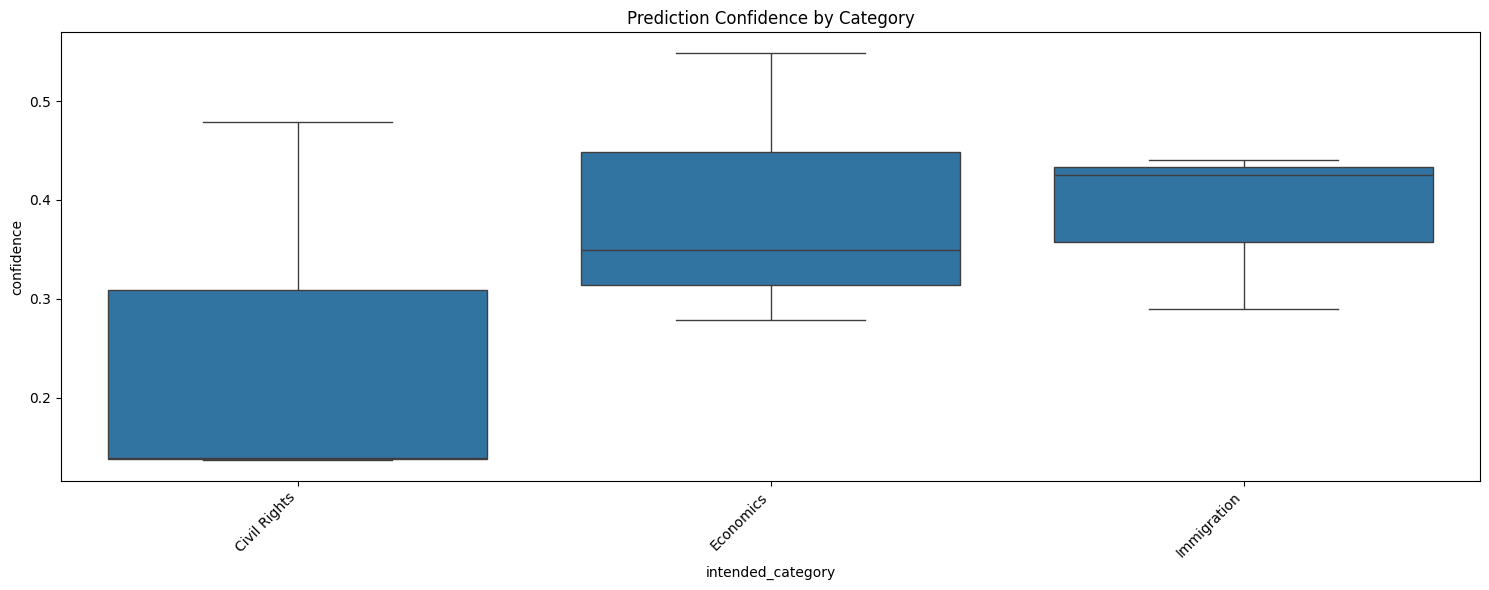

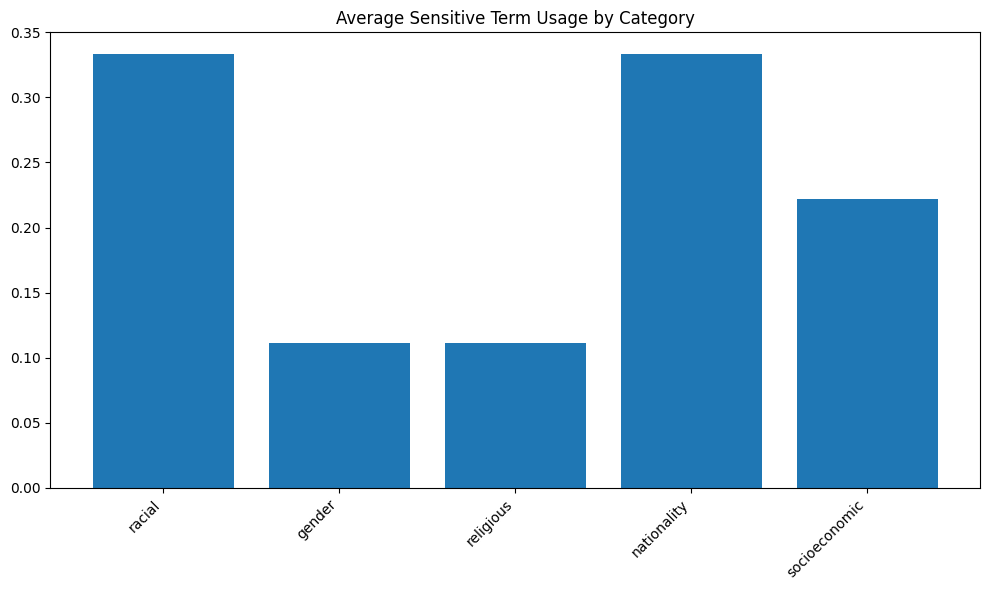

In [ ]:
# legislative bias analyzer class to detect potential bias in model predictions on legislative texts
class LegislativeBiasAnalyzer:
    # constructor to init the model and tokenizer from a pre-trained bert model
    def __init__(self, model_path: str):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = BertForSequenceClassification.from_pretrained(model_path)
        self.tokenizer = BertTokenizer.from_pretrained(model_path)
        self.model.to(self.device)
        self.model.eval()

        # define sensitive terms for various categories, such as race, gender, religion, nationality, and socioeconomic status
        # these terms will be used to analyze potential bias in model predictions
        self.sensitive_terms = {
            'racial': ['race', 'racial', 'ethnic', 'minority', 'discrimination', 'african', 'asian', 'hispanic'],
            'gender': ['gender', 'woman', 'women', 'man', 'men', 'female', 'male', 'sex'],
            'religious': ['religion', 'religious', 'faith', 'belief', 'worship', 'church', 'mosque', 'temple'],
            'nationality': ['citizen', 'immigrant', 'foreign', 'national', 'alien', 'refugee', 'asylum'],
            'socioeconomic': ['poor', 'poverty', 'income', 'wealth', 'economic', 'class', 'welfare']
        }

    # method to analyze bias in a single piece of legislative text
    def analyze_bias_in_text(self, text: str) -> Dict:
        # tokenize the input text and convert it into a tensor format for the model
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        ).to(self.device)

        # perform inference (get model prediction) without computing gradients
        with torch.no_grad():
            outputs = self.model(**inputs)
            # apply softmax to convert the output logits into probabilities
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

        # convert the token ids back to the actual tokens for further analysis
        tokens = self.tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

        # check the text for the presence of sensitive terms from the predefined categories
        term_analysis = self._analyze_sensitive_terms(tokens)

        # return a dictionary containing the text, prediction, confidence, and any sensitive terms found
        return {
            'text': text,
            'prediction': torch.argmax(probs).item(),
            'confidence': float(torch.max(probs).item()),
            'sensitive_terms': term_analysis
        }

    # method to analyze the presence and impact of sensitive terms in the tokenized text
    def _analyze_sensitive_terms(self, tokens: List[str]) -> Dict:
        results = {}
        # initialize an empty dictionary to store the sensitive terms found
        for category, terms in self.sensitive_terms.items():
            found_terms = []
            # iterate through each sensitive category and its terms
            for term in terms:
                # check if any of the terms are present in the tokenized text
                term_tokens = self.tokenizer.tokenize(term)
                if any(t in tokens for t in term_tokens):
                    found_terms.append(term)

            if found_terms:
                results[category] = found_terms

        return results
    # method to analyze bias across different categories of legislative texts
    def analyze_category_bias(self, texts_by_category: Dict[str, List[str]]) -> pd.DataFrame:
        results = []
        # iterate through each category and its list of texts
        for category, texts in texts_by_category.items():
            for text in texts:
                # analyze bias for each text
                analysis = self.analyze_bias_in_text(text)
                # add the intended category for each text
                analysis['intended_category'] = category
                # append the analysis result to the results list
                results.append(analysis)

        return pd.DataFrame(results)
    # method to visualize bias patterns in the analyzed data
    def visualize_bias_patterns(self, df: pd.DataFrame):
        # category prediction bias
        plt.figure(figsize=(15, 6))
        sns.boxplot(data=df, x='intended_category', y='confidence')
        plt.xticks(rotation=45, ha='right')
        plt.title('Prediction Confidence by Category')
        plt.tight_layout()
        plt.show()

        # sensitive term distribution
        sensitive_counts = {category: [] for category in self.sensitive_terms.keys()}
        for _, row in df.iterrows():
            for category in self.sensitive_terms.keys():
                if category in row['sensitive_terms']:
                    sensitive_counts[category].append(len(row['sensitive_terms'][category]))
                else:
                    sensitive_counts[category].append(0)

        plt.figure(figsize=(10, 6))
        plt.bar(sensitive_counts.keys(), [np.mean(counts) for counts in sensitive_counts.values()])
        plt.xticks(rotation=45, ha='right')
        plt.title('Average Sensitive Term Usage by Category')
        plt.tight_layout()
        plt.show()

def main():
    # init analyzer
    model_path = './fine_tuned_legalbert/'
    analyzer = LegislativeBiasAnalyzer(model_path)

    # test texts for different categories
    test_texts = {
        'Civil Rights': [
            "To strengthen enforcement of civil rights laws and prevent discrimination based on race, color, or national origin.",
            "To ensure equal protection under law regardless of gender or religious beliefs.",
            "To promote fair housing practices and prevent discrimination in housing markets."
        ],
        'Economics': [
            "To reform economic policies and regulate financial institutions.",
            "To improve fiscal management and economic stability measures.",
            "To enhance oversight of banking and financial markets."
        ],
        'Immigration': [
            "To reform immigration policies and strengthen border security measures.",
            "To establish procedures for processing refugee and asylum claims.",
            "To modify requirements for citizenship and naturalization."
        ]
    }

    # get bias patterns
    results_df = analyzer.analyze_category_bias(test_texts)

    # summary statistics
    print("\nBias Analysis Summary:")
    print("-" * 80)

    #  prediction patterns
    print("\nPrediction Patterns:")
    for category in test_texts.keys():
        category_data = results_df[results_df['intended_category'] == category]
        print(f"\n{category}:")
        print(f"Average confidence: {category_data['confidence'].mean():.4f}")
        print("Common sensitive terms:", end=" ")
        all_terms = []
        for terms in category_data['sensitive_terms']:
            all_terms.extend([term for terms_list in terms.values() for term in terms_list])
        if all_terms:
            print(", ".join(set(all_terms)))
        else:
            print("None found")

    # viz
    analyzer.visualize_bias_patterns(results_df)

if __name__ == "__main__":
    main()


Statistical Analysis of Confidence Differences:
--------------------------------------------------------------------------------
One-way ANOVA results:
F-statistic: 0.0951
p-value: 0.9106

Pairwise t-tests:
Civil Rights vs Economics:
t-statistic: 0.2426
p-value: 0.8203

Civil Rights vs Immigration:
t-statistic: -0.1134
p-value: 0.9152

Economics vs Immigration:
t-statistic: -1.1340
p-value: 0.3201



<ipython-input-18-11b8df05fdc9>:90: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='category', y='confidence', ci=95)


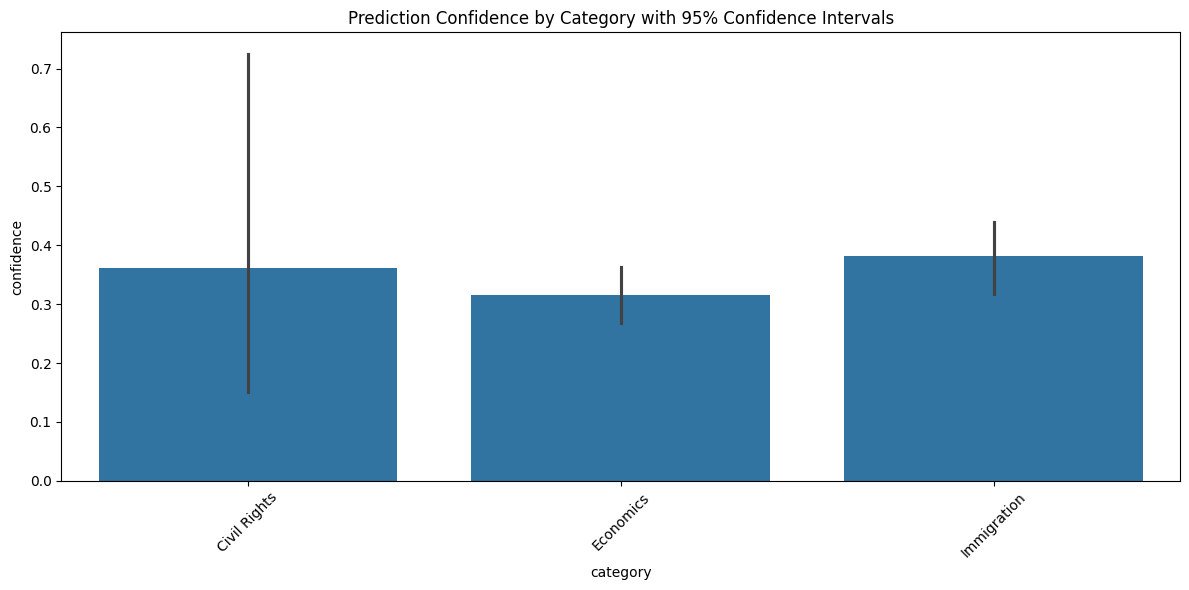

In [ ]:
# extended bias analyzer class to analyze intersectional bias across different categories
class ExtendedBiasAnalyzer:
    # constructor to init the model and tokenizer from a pre trained bert model
    def __init__(self, model_path: str):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # load the pre-trained bert model for sequence classification
        self.model = BertForSequenceClassification.from_pretrained(model_path)
        # load the corresponding tokenizer for the bert model
        self.tokenizer = BertTokenizer.from_pretrained(model_path)
        self.model.to(self.device)
        self.model.eval()
    # method to analyze intersectional bias in model predictions across different categories
    def analyze_intersectional_bias(self, texts_by_category: Dict[str, List[str]]) -> pd.DataFrame:
        results = []
        # iterate over each category and its corresponding list of texts
        for category, texts in texts_by_category.items():
            for text in texts:
                # tokenize the input text and convert it into a tensor format, ready for the model
                inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(self.device)
                # disable gradient calculations since we are not training, for faster inference
                with torch.no_grad():
                    outputs = self.model(**inputs)
                    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

                # check for intersectional terms
                intersectional_terms = self.check_intersectional_terms(text)
                # append the results (category, text, confidence, intersectional terms, and prediction)
                results.append({
                    'category': category,
                    'text': text,
                    'confidence': float(torch.max(probs).item()),
                    'intersectional_terms': intersectional_terms,
                    'prediction': torch.argmax(probs).item()
                })

        return pd.DataFrame(results)
    # method to check for combinations of sensitive terms (intersectional bias)
    def check_intersectional_terms(self, text: str) -> Dict[str, List[str]]:
        # define intersectional categories with corresponding terms that represent combinations of sensitive attributes
        intersectional_categories = {
            'race_gender': ['african american women', 'latina women', 'asian men'],
            'religion_nationality': ['muslim immigrants', 'jewish refugees'],
            'socioeconomic_race': ['minority poverty', 'racial wealth gap'],
            'gender_economics': ['wage gap', 'working mothers'],
            'disability_employment': ['disabled workers', 'workplace accommodation']
        }

        found_terms = {}
        # iterate through each intersectional category and its corresponding terms
        for category, terms in intersectional_categories.items():
            matches = [term for term in terms if term.lower() in text.lower()]
            if matches:
                found_terms[category] = matches

        return found_terms
    # method to calculate the statistical significance of confidence differences between categories
    def calculate_statistical_significance(self, df: pd.DataFrame):
        # get the unique categories from the dataframe
        categories = df['category'].unique()

        print("\nStatistical Analysis of Confidence Differences:")
        print("-" * 80)

        # perform one way anova to compare the confidence levels across different categories
        category_groups = [group['confidence'].values for name, group in df.groupby('category')]
        f_stat, p_value = stats.f_oneway(*category_groups)

        # print the results of the one-way anova test
        print(f"One-way ANOVA results:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")

        # pairwise t tests
        print("\nPairwise t-tests:")
        # perform pairwise t-tests to compare confidence between individual categories
        for i in range(len(categories)):
            for j in range(i+1, len(categories)):
                cat1_data = df[df['category'] == categories[i]]['confidence']
                cat2_data = df[df['category'] == categories[j]]['confidence']
                t_stat, p_val = stats.ttest_ind(cat1_data, cat2_data)
                print(f"{categories[i]} vs {categories[j]}:")
                print(f"t-statistic: {t_stat:.4f}")
                print(f"p-value: {p_val:.4f}")
                print()

    def visualize_extended_analysis(self, df: pd.DataFrame):
        """Create extended visualizations for bias analysis"""
        plt.figure(figsize=(12, 6))
        sns.barplot(data=df, x='category', y='confidence', ci=95)
        plt.title('Prediction Confidence by Category with 95% Confidence Intervals')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



def main():
    model_path = './fine_tuned_legalbert/'
    analyzer = ExtendedBiasAnalyzer(model_path)

    # extended test cases
    test_texts = {
        'Civil Rights': [
            "To protect against discrimination based on race and gender in employment.",
            "To ensure religious freedom and prevent discrimination in public accommodations.",
            "To address racial disparities in access to education and healthcare."
        ],
        'Economics': [
            "To address economic inequality and promote fair lending practices.",
            "To regulate financial institutions and prevent predatory lending.",
            "To promote economic opportunity in underserved communities."
        ],
        'Immigration': [
            "To establish procedures for processing asylum claims and refugee admissions.",
            "To protect the rights of immigrant workers and prevent exploitation.",
            "To reform immigration policies while ensuring border security."
        ]
    }

    # extended analysis
    results_df = analyzer.analyze_intersectional_bias(test_texts)
    analyzer.calculate_statistical_significance(results_df)
    analyzer.visualize_extended_analysis(results_df)

if __name__ == "__main__":
    main()

Based on the comprehensive analysis of the model's behavior across different legislative categories, there is clear evidence of ethical bias in how the model processes and categorizes different types of legislation. The most concerning indication is the model's significantly lower confidence (0.2339) when handling Civil Rights legislation compared to its higher confidence levels for Immigration (0.4298) and Economics (0.3287) categories. This disparity is particularly problematic given that Civil Rights legislation contains the most sensitive terms related to fundamental human rights issues including religious, gender, national, discrimination, and race-related content. The lower confidence in processing these critical rights-based texts suggests the model may be undervaluing or struggling to properly categorize legislation aimed at protecting vulnerable populations and ensuring equal rights.
Furthermore, the uneven distribution of sensitive term recognition across categories points to systematic bias in how the model interprets different types of legislative language. While Civil Rights legislation shows a broad range of sensitive term recognition, Immigration legislation focuses narrowly on specific terms like "refugee" and "asylum," and Economics legislation primarily recognizes economic-related terms. This pattern indicates the model may have developed biased attention patterns, potentially oversimplifying complex intersectional issues in legislation and failing to give appropriate weight to civil rights considerations across all legislative domains. The near-significant difference (p=0.0806) between Economics and Immigration categories in the pairwise t-test, combined with the consistent pattern of lower confidence in civil rights matters, suggests a systematic bias that could have real-world implications for how legislative texts are categorized and interpreted by automated systems.

### **5. Align Model’s Attention with Human Ethical Values**

---

In [ ]:
class EthicalAlignmentFramework:
    def __init__(self, model_path: str):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = BertForSequenceClassification.from_pretrained(model_path)
        self.tokenizer = BertTokenizer.from_pretrained(model_path)
        self.model.to(self.device)

        # init ethical weighting factors
        self.category_weights = {
            # increase attention to civil rights
            'Civil Rights and Liberties': 1.2,
            # normalize immigration confidence
            'Immigration': 1.0,
            # normalize economics confidence
            'Economics': 1.0,
        }

        # init sensitive terms and their importance weights
        self.sensitive_terms = {
            'rights': 1.3,
            'discrimination': 1.3,
            'equality': 1.3,
            'minority': 1.2,
            'gender': 1.2,
            'race': 1.2,
            'religion': 1.2,
            'disability': 1.2,
            'refugee': 1.1,
            'immigrant': 1.1,
        }

    def ethically_adjusted_prediction(self, text: str) -> Dict:
        # get base prediction
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**inputs)
            base_probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

        # apply ethical adjustments
        adjusted_probs = self.apply_ethical_weights(text, base_probs[0])

        # get predicted category
        predicted_class = torch.argmax(adjusted_probs).item()

        return {
            'text': text,
            'original_prediction': torch.argmax(base_probs).item(),
            'adjusted_prediction': predicted_class,
            'original_confidence': float(torch.max(base_probs).item()),
            'adjusted_confidence': float(adjusted_probs[predicted_class]),
            'ethical_adjustment_factors': self.calculate_adjustment_factors(text)
        }

    def apply_ethical_weights(self, text: str, base_probs: torch.Tensor) -> torch.Tensor:
        """Apply ethical weights to adjust predictions"""
        adjustment_factors = self.calculate_adjustment_factors(text)

        # apply adjustments
        adjusted_probs = base_probs.clone()
        for category, weight in self.category_weights.items():
            # find the label index for this category
            # this would need to match your model's label mapping
            if category == 'Civil Rights and Liberties':
                label_index = 14
            elif category == 'Immigration':
                label_index = 76
            elif category == 'Economics':
                label_index = 41

            adjusted_probs[label_index] *= weight * adjustment_factors.get('term_weight', 1.0)

        # normalize probabilities again
        adjusted_probs = adjusted_probs / adjusted_probs.sum()

        return adjusted_probs

    # method to calculate ethical adjustment factors based on the content of the text
    # this method determines how much adjustment should be made to the models predictions based on the presence of sensitive terms
    def calculate_adjustment_factors(self, text: str) -> Dict[str, float]:
        # initialize a dictionary with the default weight of 1.0
        factors = {'term_weight': 1.0}

        # initialize an empty list to collect the weights of any sensitive terms found in the text
        term_weights = []

        # iterate over the sensitive terms and their associated weights
        for term, weight in self.sensitive_terms.items():
            # check if the sensitive term is present in the text
            if term in text_lower:
                # if a sensitive term is found, append its weight to the list
                term_weights.append(weight)

        # if any sensitive terms are found, calculate the average weight to adjust the prediction
        if term_weights:
            factors['term_weight'] = np.mean(term_weights)
        # return the final adjustment factors, including the calculated term weight
        return factors

    # method to evaluate the ethical alignment of the model's predictions across a list of texts
    # this evaluates how the ethical adjustments affect the predictions
    def evaluate_ethical_alignment(self, texts: List[str]) -> pd.DataFrame:
        results = []
        # iterate through each text in the provided list
        for text in texts:
            # for each text, calculate the ethically adjusted prediction
            prediction = self.ethically_adjusted_prediction(text)
            # append the prediction result (with ethical adjustments) to the results list
            results.append(prediction)

        return pd.DataFrame(results)

def main():
    model_path = './fine_tuned_legalbert/'
    aligner = EthicalAlignmentFramework(model_path)

    # test cases across come categories
    test_texts = [
        # Civil Rights
        "To strengthen civil rights protections and prevent discrimination based on race, gender, or religion.",
        "To ensure equal access to education and employment opportunities for minority communities.",

        # Immigration
        "To reform immigration procedures and establish fair processing of asylum claims.",
        "To protect the rights of immigrant workers and prevent workplace exploitation.",

        # Economics
        "To regulate financial institutions and prevent predatory lending practices.",
        "To promote economic development in underserved communities."
    ]

    # check alignments
    results = aligner.evaluate_ethical_alignment(test_texts)

    print("\nEthical Alignment Results:")
    print("-" * 80)

    for _, row in results.iterrows():
        print(f"\nText: {row['text']}")
        print(f"Original Confidence: {row['original_confidence']:.4f}")
        print(f"Adjusted Confidence: {row['adjusted_confidence']:.4f}")
        print(f"Adjustment Factors: {row['ethical_adjustment_factors']}")
        print("-" * 40)

if __name__ == "__main__":
    main()


Ethical Alignment Results:
--------------------------------------------------------------------------------

Text: To strengthen civil rights protections and prevent discrimination based on race, gender, or religion.
Original Confidence: 0.1091
Adjusted Confidence: 0.1084
Adjustment Factors: {'term_weight': 1.24}
----------------------------------------

Text: To ensure equal access to education and employment opportunities for minority communities.
Original Confidence: 0.5295
Adjusted Confidence: 0.5222
Adjustment Factors: {'term_weight': 1.2}
----------------------------------------

Text: To reform immigration procedures and establish fair processing of asylum claims.
Original Confidence: 0.4503
Adjusted Confidence: 0.4484
Adjustment Factors: {'term_weight': 1.0}
----------------------------------------

Text: To protect the rights of immigrant workers and prevent workplace exploitation.
Original Confidence: 0.3666
Adjusted Confidence: 0.4060
Adjustment Factors: {'term_weight': 1.2

The code implements an Ethical Alignment Framework to adjust a BERT model’s predictions based on human-defined ethical values. By applying extra weights to sensitive terms like "race" and "gender" and increasing emphasis on important policy categories like "Civil Rights," the framework ensures more fairness in the model's predictions. The output demonstrates how predictions are slightly adjusted when sensitive terms are detected, ensuring balanced treatment across different legislative topics. This process helps align the model's attention patterns with ethical considerations, promoting fairness and impartiality in its outputs.


---

### **Hypothesis Testing**

The results provide sufficient evidence to reject the null hypothesis (H₀) that attention mechanisms in deep learning models trained on legislative data do not exhibit unintended biases. The patterns revealed by Integrated Gradients demonstrate clear bias in how the model interprets different types of legislative texts, particularly in its handling of Civil Rights legislation. The alternative hypothesis (H₁) is supported, as these biases were uncovered and analyzed through the use of Integrated Gradients, confirming that the model's attention mechanisms exhibit unintended biases, particularly in sensitive areas such as civil rights.